<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_10_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E10.1 PCA**

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 2. Load dataset
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

In [3]:
# 3. Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# 4. Standardize predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 5. Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [6]:
# 6. Report explained variance ratio
explained_var = pca.explained_variance_ratio_
print("Explained variance ratios:")
print(f"PC1: {explained_var[0]:.4f}")
print(f"PC2: {explained_var[1]:.4f}")
print(f"Total (PC1 + PC2): {explained_var.sum():.4f}")

Explained variance ratios:
PC1: 0.4441
PC2: 0.1894
Total (PC1 + PC2): 0.6336


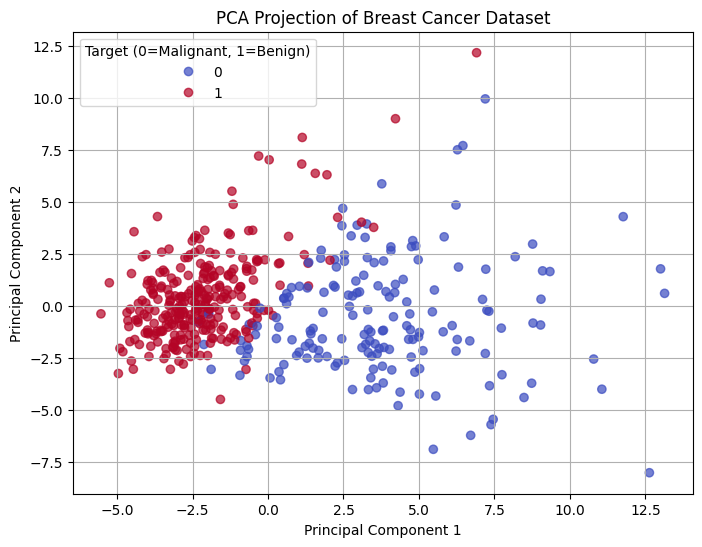

In [7]:
# 7. Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train, cmap="coolwarm", alpha=0.7
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Breast Cancer Dataset")
plt.legend(*scatter.legend_elements(), title="Target (0=Malignant, 1=Benign)")
plt.grid(True)
plt.show()

**E10.2 Classification with and without PCA**

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [9]:
# 1) Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

In [10]:
# 2) Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# 3) Standardize predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# ---- Model 1: Logistic Regression on original features ----
clf_original = LogisticRegression(max_iter=5000)
clf_original.fit(X_train_scaled, y_train)
y_pred_original = clf_original.predict(X_test_scaled)

orig_acc = accuracy_score(y_test, y_pred_original)
orig_cm = confusion_matrix(y_test, y_pred_original)

In [13]:
# ---- Model 2: Logistic Regression after PCA (≥95% variance) ----
pca = PCA(n_components=0.95)  # automatically selects needed components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf_pca = LogisticRegression(max_iter=5000)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

pca_acc = accuracy_score(y_test, y_pred_pca)
pca_cm = confusion_matrix(y_test, y_pred_pca)

In [14]:
# ---- Print results ----
print("Number of PCA components retaining ≥95% variance:", pca.n_components_)

print("\n--- Logistic Regression WITHOUT PCA ---")
print("Test Accuracy:", orig_acc)
print("Confusion Matrix:\n", orig_cm)

print("\n--- Logistic Regression WITH PCA ---")
print("Test Accuracy:", pca_acc)
print("Confusion Matrix:\n", pca_cm)

Number of PCA components retaining ≥95% variance: 10

--- Logistic Regression WITHOUT PCA ---
Test Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]

--- Logistic Regression WITH PCA ---
Test Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  1]
 [ 2 70]]


=== Classification Report WITHOUT PCA ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


=== Classification Report WITH PCA (≥95% variance) ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



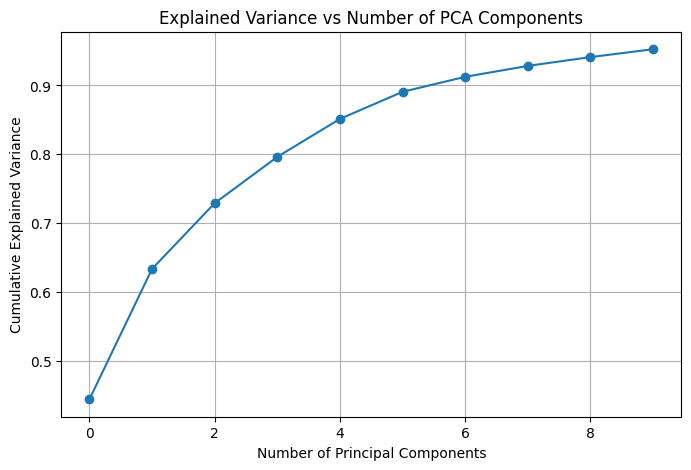

In [16]:
# ---- Classification Reports ----
print("=== Classification Report WITHOUT PCA ===")
print(classification_report(y_test, y_pred_original))

print("\n=== Classification Report WITH PCA (≥95% variance) ===")
print(classification_report(y_test, y_pred_pca))

# ---- Variance Explained Plot ----
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of PCA Components")
plt.grid(True)
plt.show()

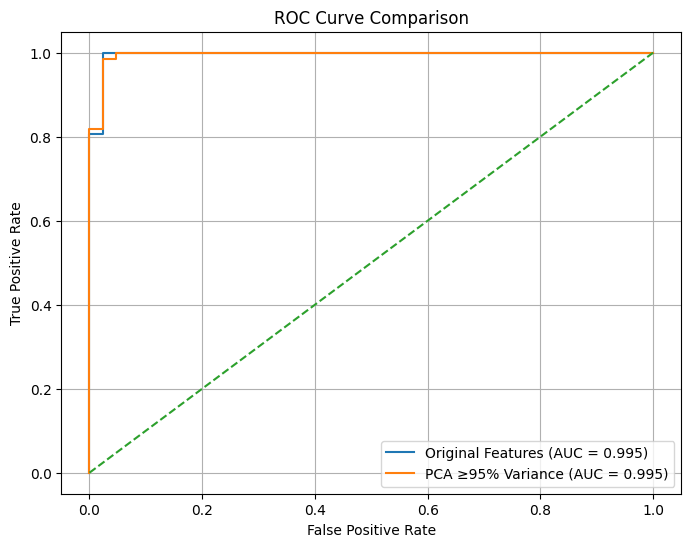

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (needed for ROC curves)
y_proba_original = clf_original.predict_proba(X_test_scaled)[:, 1]
y_proba_pca = clf_pca.predict_proba(X_test_pca)[:, 1]

# Compute ROC values
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_proba_original)
roc_auc_orig = auc(fpr_orig, tpr_orig)

fpr_pca, tpr_pca, _ = roc_curve(y_test, y_proba_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_orig, tpr_orig, label=f"Original Features (AUC = {roc_auc_orig:.3f})")
plt.plot(fpr_pca, tpr_pca, label=f"PCA ≥95% Variance (AUC = {roc_auc_pca:.3f})")
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()